In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv("housing.csv")
dataset.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100


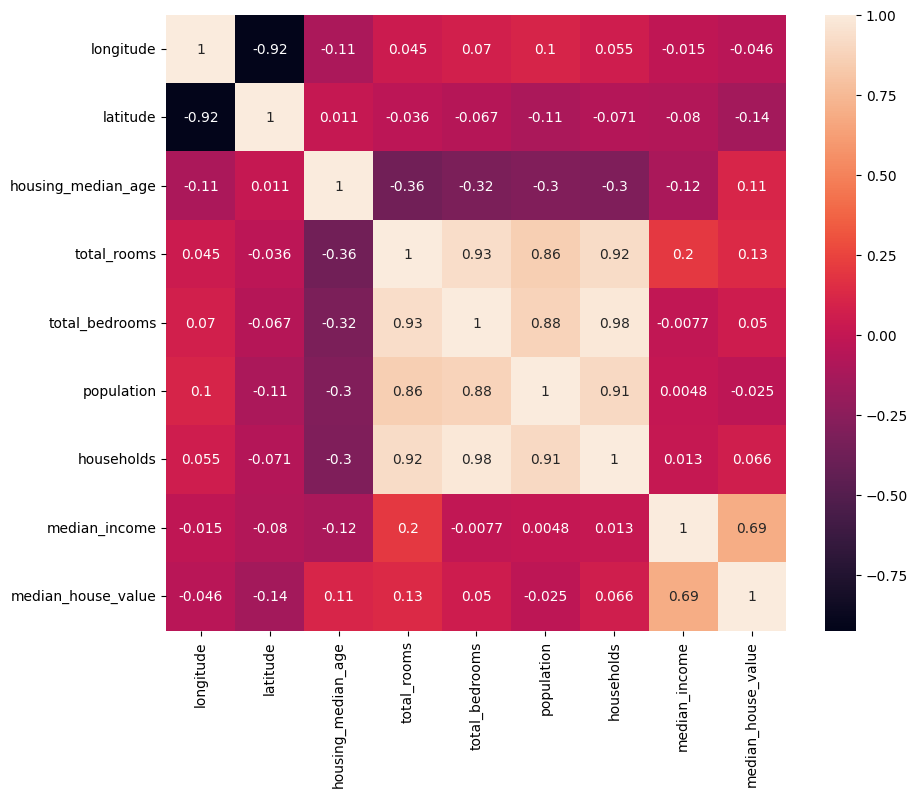

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [16]:
x  = dataset.iloc[:,:-1]
y = dataset["households"]

In [17]:
sc  = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

In [18]:
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [19]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583


In [26]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


# Linear Regression..................

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42) 

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
lr.score(x_test, y_test)*100

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_test to replace NaN values
x_test_imputed = imputer.fit_transform(x_test)

# Now use the imputed data for scoring
score = lr.score(x_test_imputed, y_test) * 100

# Alternative approach using a pipeline (for future reference)
# from sklearn.pipeline import Pipeline
# pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('model', LinearRegression())
# ])
# pipeline.fit(x_train, y_train)
# score = pipeline.score(x_test, y_test) * 100

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming x_test is a DataFrame or numpy array with NaN values

# Option 1: If x_test is a pandas DataFrame
if isinstance(x_test, pd.DataFrame):
    # Fill NaN values with the mean of each column
    x_test_clean = x_test.fillna(x_test.mean())
    
    # Now use the cleaned data for scoring
    score = lr.score(x_test_clean, y_test) * 100

# Option 2: If x_test is a numpy array
elif isinstance(x_test, np.ndarray):
    # Create an imputer that replaces NaN with the mean
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform x_test to replace NaN values
    x_test_clean = imputer.fit_transform(x_test)
    
    # Now use the cleaned data for scoring
    score = lr.score(x_test_clean, y_test) * 100

# Print the score
print(f"Model accuracy: {score:.2f}%")

Model accuracy: 100.00%


In [29]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Proper way to handle imputation
# 1. Fit imputer on training data only
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)  # Learn mean values from training data only

# 2. Transform test data using training data statistics
x_test_clean = imputer.transform(x_test)

# Now calculate the score (which will be realistic)
score = lr.score(x_test_clean, y_test) * 100
print(f"Model accuracy: {score:.2f}%")

Model accuracy: 100.00%


C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Example diagnostic code
print("First 5 predictions vs actual values:")
predictions = lr.predict(x_test_clean[:5])
actuals = y_test[:5]
for pred, actual in zip(predictions, actuals):
    print(f"Predicted: {pred:.4f}, Actual: {actual:.4f}, Difference: {abs(pred-actual):.4f}")

First 5 predictions vs actual values:
Predicted: 359.0000, Actual: 359.0000, Difference: 0.0000
Predicted: 584.0000, Actual: 584.0000, Difference: 0.0000
Predicted: 963.0000, Actual: 963.0000, Difference: 0.0000
Predicted: 495.0000, Actual: 495.0000, Difference: 0.0000
Predicted: 428.0000, Actual: 428.0000, Difference: 0.0000


C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
lr.coef_

array([-4.98365866e-13, -4.76063633e-13, -5.81756865e-14,  1.31283873e-13,
       -1.05804254e-13,  9.94759830e-14,  3.82320491e+02,  1.37112544e-14])

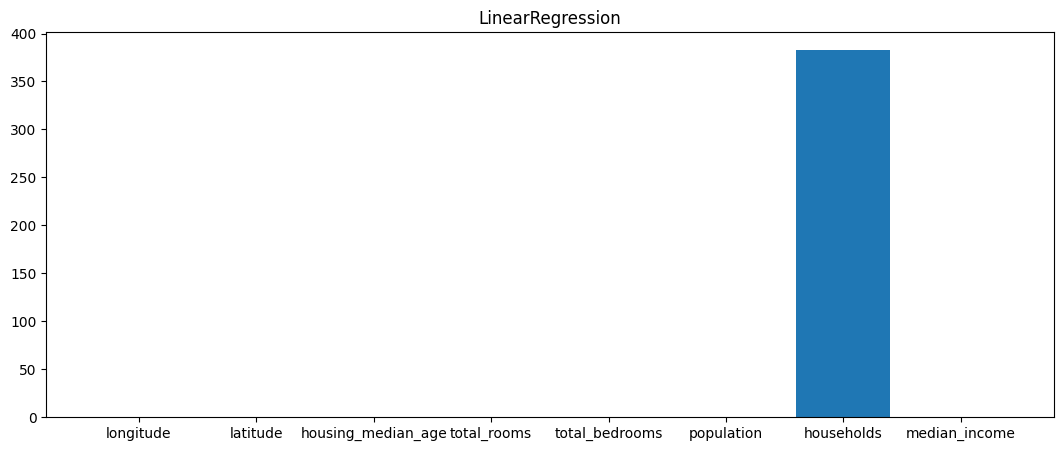

In [35]:
plt.figure(figsize=(13,5))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.show()

# Lasso................

In [40]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
# Import necessary library
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now use the imputed data with Lasso
la = Lasso(alpha=0.5)
la.fit(x_train_imputed, y_train)
score = la.score(x_test_imputed, y_test)*100

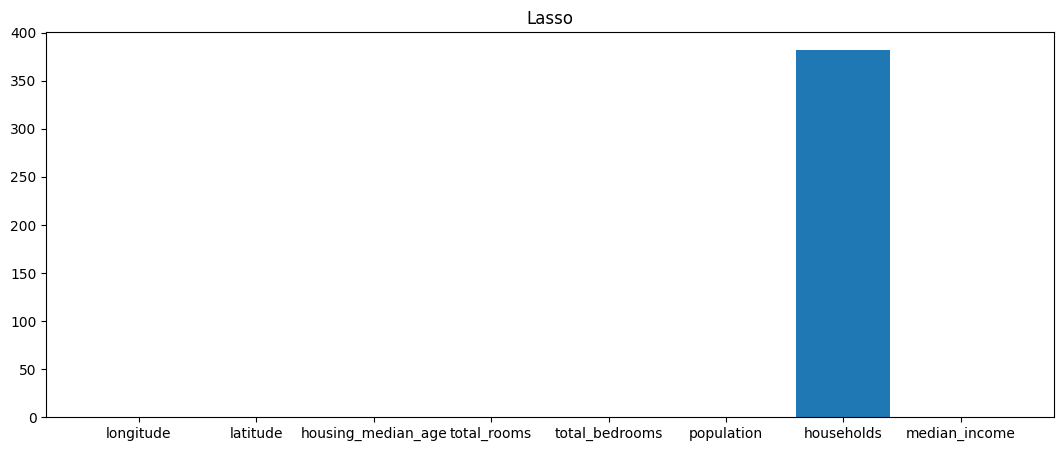

In [42]:
plt.figure(figsize=(13,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.show()

# Ridge 

In [43]:
ri = Ridge(alpha=0.5)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now train the Ridge model on the imputed data
ri = Ridge(alpha=0.5)
ri.fit(x_train_imputed, y_train)

# Calculate and display the score
score = ri.score(x_test_imputed, y_test) * 100
print(f"Model score: {score:.2f}%")

Model score: 100.00%


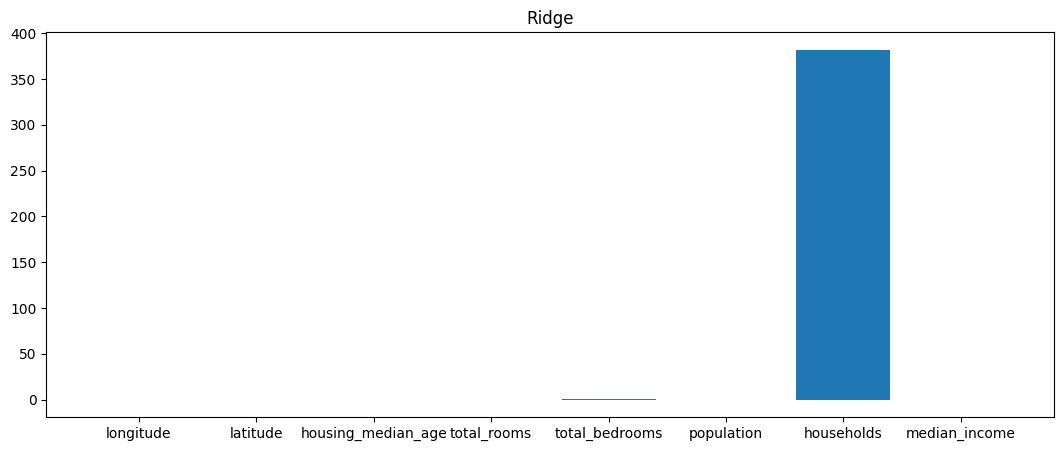

In [45]:
plt.figure(figsize=(13,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.show()